# Titanic Classification

Titanic veri seti, 1912 yılında batan Titanic gemisindeki yolcuların bilgilerini içerir. Bu projede amaç, yolcunun hayatta kalıp kalmadığını tahmin eden bir makine öğrenmesi modeli geliştirmektir. Model, yaş, cinsiyet, bilet sınıfı gibi özelliklere göre tahmin yapar.

In [54]:
import pandas as pd

In [55]:
df1=pd.read_csv('ttrain.csv')

In [56]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df2=pd.read_csv('ttest.csv')

In [58]:
df2.head()    # Survived stunu yok zaten bunu tahmin etmek istediğim için olmayacak

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
# Modelde x_train ve x_test aynı yapıda olmalı

In [60]:
df=pd.concat([df1,df2])   # 2 datayı birleştirdik

In [61]:
df.shape

(1309, 12)

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.info()   # Veri tiplerini inceliyoruz

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [64]:
df.isnull().sum()   # Boş verileri inceledik

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [65]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [66]:
df.Survived.value_counts()   # Survived stununda ki verileri saydırdık

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [67]:
df.corr(numeric_only=True)  # Hangi stünun hangisine ne kadar etkisi var 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [68]:
# İşimize yarayilecek stünlar: Pclass Age Sex gibi stunları belirlemeliyiz burda yorum yapmamız lazım

In [69]:
# Cabin verisinde çok fazla boş veri var bunu doldurmak riskli olabilir dolayısıyla kullanmamaya karar verdik

In [70]:
import matplotlib.pyplot as plt

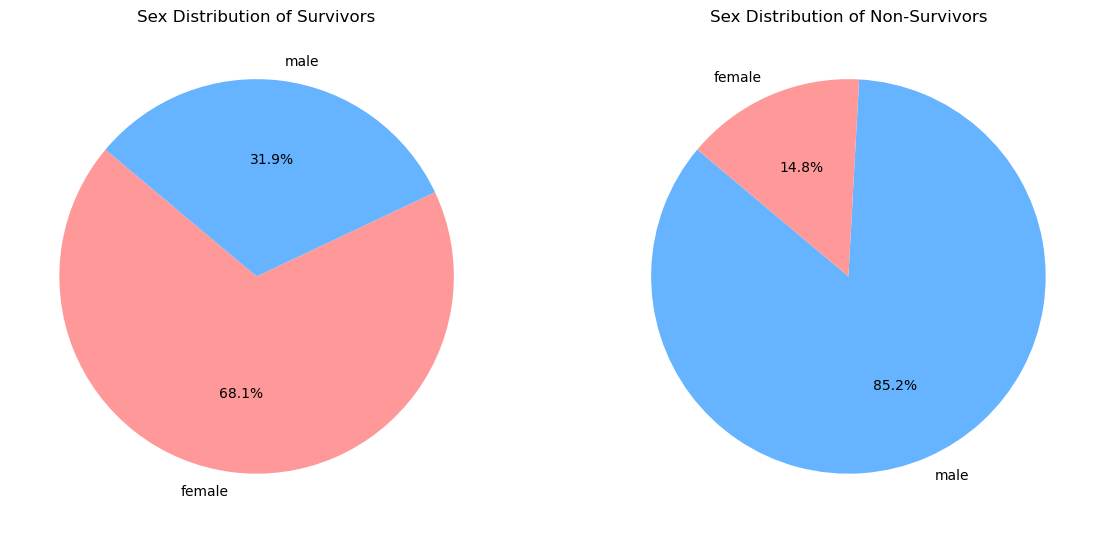

In [71]:
survived_sex_distribution=df[df['Survived']==1]['Sex'].value_counts()
not_survived_sex_distribution=df[df['Survived']==0]['Sex'].value_counts()
labels_survived=survived_sex_distribution.index
sizes_survived=survived_sex_distribution.values
labels_not_survived=not_survived_sex_distribution.index
sizes_not_survived=not_survived_sex_distribution.values
colors = ['#ff9999','#66b3ff']
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,7))
ax1.pie(sizes_survived,labels=labels_survived,autopct='%1.1f%%',colors=colors,startangle=140)
ax1.set_title('Sex Distribution of Survivors')
colors=['#66b3ff','#ff9999']
ax2.pie(sizes_not_survived,labels=labels_not_survived,autopct='%1.1f%%',colors=colors,startangle=140)
ax2.set_title('Sex Distribution of Non-Survivors')
colors=['#66b3ff','#ff9999']
plt.show()
plt.show()

In [72]:
#Fare 1 tane boş olduğu için direkt mode ile dolduracağız

In [73]:
del df['Cabin']  # Cabin stünu silindi

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [75]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [76]:
df['Fare'].value_counts()    # Hangi veriden ne kadar var onu gösteriyor

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [77]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())   # Boş veriyi fillna ile Fare'in mean i ile dolduruyoruz

In [78]:
df.isnull().sum()   # Kontrol ederek devam ediyoruz

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [79]:
df['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [80]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])   # 0 yazarak S i seçmiş olduk 1 desek C olacaktı 

In [81]:
df.isnull().sum()   # Embarked kısmını kontrol ettik

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [82]:
# Name kısmından Mr MSS kısmını çekeceğiz

In [83]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)    # Yeni bir Title adında stün oluşturuyoruz Boşluktan sonra ki A Z harfleri al \. ya kadar

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [85]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [86]:
df['Title']=df['Title'].replace(['Rev','Dr','Col','Major','Sir','Don','Capt','Jonkheer'],'Mr')   # Erkekleri Mr içine atadık

In [87]:
df['Title'].value_counts()

Title
Mr          783
Miss        260
Mrs         197
Master       61
Ms            2
Mlle          2
Mme           1
Lady          1
Countess      1
Dona          1
Name: count, dtype: int64

In [88]:
df['Title']=df['Title'].replace(['Lady','Countess','Dona','Mme'],'Mrs')

In [89]:
df['Title'].value_counts()

Title
Mr        783
Miss      260
Mrs       201
Master     61
Ms          2
Mlle        2
Name: count, dtype: int64

In [90]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')

In [91]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [92]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))  
# Age stünunu Title dakilerin Age lerinin meanlarına göre grupladık
# fillna doldurma fonksiyonu Title stünunun yaş ortalamasını aldık ve boşluklara grupladıklarımızın boş stunlarına ortalamalarını yazdık

In [93]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [94]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [95]:
del df['Name']
del df['Ticket']
del df['Embarked']

In [96]:
df=pd.get_dummies(df,drop_first=True)   
# Modele boş veri ve object veremem mesela Sex Male ve Female yani object veri bunları 1-0 şeklinde sayısal verieye çeviriyoruz

In [97]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,1,0.0,3,22.0,1,0,7.2500,True,False,True,False
1,2,1.0,1,38.0,1,0,71.2833,False,False,False,True
2,3,1.0,3,26.0,0,0,7.9250,False,True,False,False
3,4,1.0,1,35.0,1,0,53.1000,False,False,False,True
4,5,0.0,3,35.0,0,0,8.0500,True,False,True,False


In [98]:
train=df[:891]
test=df[891:]   # Bu şekilde 2 ye bölmüş olduk tekrardan

In [99]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,892,NaN,3,34.5,0,0,7.8292,True,False,True,False
1,893,NaN,3,47.0,1,0,7.0000,False,False,False,True
2,894,NaN,2,62.0,0,0,9.6875,True,False,True,False
3,895,NaN,3,27.0,0,0,8.6625,True,False,True,False
4,896,NaN,3,22.0,1,1,12.2875,False,False,False,True


In [100]:
test.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
413,1305,NaN,3,32.811056,0,0,8.0500,True,False,True,False
414,1306,NaN,1,39.000000,0,0,108.9000,False,False,False,True
415,1307,NaN,3,38.500000,0,0,7.2500,True,False,True,False
416,1308,NaN,3,32.811056,0,0,8.0500,True,False,True,False
417,1309,NaN,3,5.482642,1,1,22.3583,True,False,False,False


In [101]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,1,0.0,3,22.0,1,0,7.2500,True,False,True,False
1,2,1.0,1,38.0,1,0,71.2833,False,False,False,True
2,3,1.0,3,26.0,0,0,7.9250,False,True,False,False
3,4,1.0,1,35.0,1,0,53.1000,False,False,False,True
4,5,0.0,3,35.0,0,0,8.0500,True,False,True,False


In [102]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
886,887,0.0,2,27.000000,0,0,13.00,True,False,True,False
887,888,1.0,1,19.000000,0,0,30.00,False,True,False,False
888,889,0.0,3,21.824366,1,2,23.45,False,True,False,False
889,890,1.0,1,26.000000,0,0,30.00,True,False,True,False
890,891,0.0,3,32.000000,0,0,7.75,True,False,True,False


In [103]:
x=train.drop(['Survived','PassengerId'],axis=1)

In [104]:
y=train[['Survived']]

In [106]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
r=RandomForestClassifier()
g=GradientBoostingClassifier()

In [108]:
r.fit(x,y)

C:\Users\ibrahim\AppData\Local\Temp\ipykernel_44288\2591809438.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r.fit(x,y)


RandomForestClassifier()

In [109]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,892,NaN,3,34.5,0,0,7.8292,True,False,True,False
1,893,NaN,3,47.0,1,0,7.0000,False,False,False,True
2,894,NaN,2,62.0,0,0,9.6875,True,False,True,False
3,895,NaN,3,27.0,0,0,8.6625,True,False,True,False
4,896,NaN,3,22.0,1,1,12.2875,False,False,False,True


In [112]:
test=test.drop(['PassengerId','Survived'],axis=1)

In [113]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,True,False,True,False
1,3,47.0,1,0,7.0000,False,False,False,True
2,2,62.0,0,0,9.6875,True,False,True,False
3,3,27.0,0,0,8.6625,True,False,True,False
4,3,22.0,1,1,12.2875,False,False,False,True


In [118]:
tahmin=r.predict(test)    # test ve x in yapısı aynı olmalı
# Tahminleri yaptık

In [119]:
# Doğruluk oranlarına bakacağız

In [120]:
sonuc=pd.DataFrame()

In [121]:
sonuc['Survived']=tahmin

In [122]:
sonuc['PassengerId']=df2['PassengerId']

In [126]:
sonuc['Survived']=sonuc['Survived'].astype('int32')   # Sonuc floattı integera çevirdik

In [127]:
sonuc.head()

,Survived,PassengerId
0,0,892
1,0,893
2,1,894
3,1,895
4,1,896


In [128]:
sonuc.to_csv('sonuc1.csv', index=False)

In [129]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 960F-0421

 Directory of C:\Users\ibrahim\Documents\Yapay Zeka\Day4-HW

26.07.2025  18:20    <DIR>          .
26.07.2025  07:08    <DIR>          ..
26.07.2025  15:00    <DIR>          .ipynb_checkpoints
26.07.2025  07:08             4.063 advertising.csv
26.07.2025  07:19           251.740 Advertising.ipynb
26.07.2025  18:21             3.258 sonuc1.csv
26.07.2025  18:20           144.263 Titanic_Classification.ipynb
26.07.2025  07:21            28.629 ttest.csv
26.07.2025  07:22            61.194 ttrain.csv
               6 File(s)        493.147 bytes
               3 Dir(s)  92.221.595.648 bytes free
